In [10]:
# matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy
from matplotlib.backends.backend_agg import FigureCanvasAgg
from dataset import Dataset
from IPython import display
from proc import *

In [11]:
MAX_ITER = 20

# 參數設定

## 輸入

- 正常
    - `dataset/bag/`
    - `dataset/bmx/`
    - `dataset/bolt2/`
    
- 遮蔽後變換目標
    - `dataset/fernando/`

In [12]:
data = Dataset('/home/judy/vot2016/cars/car1/')

## 輸出

In [13]:
OUTPUT_FILENAME = 'tmp_out.avi'

# 執行

## 初始化

initial target


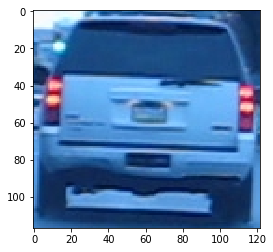

whole image


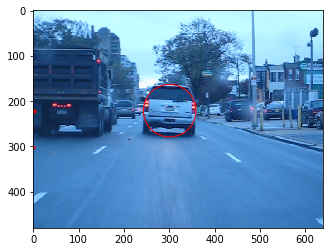

[432 288]
742


In [14]:
q0 = create_target_model(data.target(0))
y0 = numpy.average(data.gtruth[0], 0).astype(int)
h = numpy.min(numpy.diff(data.gtruth[0], axis=0).astype(int))

#
print('initial target')
plt.imshow(cv2.cvtColor(data.target(0), cv2.COLOR_BGR2RGB))
plt.show()

print('whole image')
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(data.imgs[0], cv2.COLOR_BGR2RGB))
ax.add_artist(plt.Circle(y0, h/2, color='r', fill=False))
ax.plot(y0, 'r.')
plt.show()

fig_size = (fig.get_size_inches()*fig.dpi).astype(int)
print(fig_size)

frame_cnt = len(data)
print(frame_cnt)

## 準備儲存

In [19]:
out_video = cv2.VideoWriter(
    filename=OUTPUT_FILENAME,
    fourcc=cv2.VideoWriter_fourcc(*'MJPG'),
    fps=30,
    frameSize=tuple(fig_size),
    isColor=True
)

canvas = FigureCanvasAgg(fig)

## 計算

In [28]:
for i, img in enumerate(data.imgs[1:]):
    p_y0 = create_target_candidate(img, y0, h)

    rho0 = numpy.sum(numpy.sqrt(p_y0 * q0))
    D = calc_weight(img, q0, p_y0, y0, h)

    x, y = meanshift(D)
    y1 = numpy.array((x, y)) + y0

    p_y1 = create_target_candidate(img, y1, h)
    rho1 = numpy.sum(numpy.sqrt(p_y1 * q0))
    
    itr = 0
    while rho1 < rho0 and itr < MAX_ITER:
        y1 = (y0 + y1) /2
        p_y1 = create_target_candidate(data.imgs[1], y1, h)
        rho1 = numpy.sum(numpy.sqrt(p_y1 * q0))
        itr += 1

    y0 = y1
    q0 = p_y1
    
    # output
    print('#{i}/{frame_cnt}: shift ({x}, {y})'+' '*20)
    
    ax.clear()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.add_artist(plt.Circle(y1, h/2, color='r', fill=False))
    ax.plot(y1, 'r.')
    
    canvas.draw()
    
    tmp = numpy.fromstring(
        canvas.tostring_rgb(), 
        dtype='uint8'
    )
    
    out_frame = numpy.fromstring(
        canvas.tostring_rgb(), 
        dtype='uint8'
    ).reshape((list(fig_size[::-1]) + [3]))
    
    out_frame = cv2.cvtColor(out_frame, cv2.COLOR_RGB2BGR)
    
    out_video.write(out_frame)

out_video.release()
print('- DONE -'+' '*20)

(array([[ 117.,  117.,  117., ...,  117.,  117.,  117.],
       [ 117.,  117.,  117., ...,  117.,  117.,  117.],
       [ 117.,  117.,  117., ...,  117.,  117.,  117.],
       ..., 
       [ 117.,  117.,  117., ...,  117.,  117.,  117.],
       [ 117.,  117.,  117., ...,  117.,  117.,  117.],
       [ 117.,  117.,  117., ...,  117.,  117.,  117.]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool))
#{i}/{frame_cnt}: shift ({x}, {y})                    
(array([[ 103.12586985,  103.12586985,  103.12586985, ...,  150.02732297,
         150.02732297,  150.02732297],
       [ 103.12586985,  103.12586985,  103.12586985, ...,  150.02732297,
         150.02732297,  150.02732297],
     

(array([[  62.81550408,   62.81550408,   62.81550408, ...,  102.15452083,
         102.15452083,  102.15452083],
       [  62.81550408,   62.81550408,   62.81550408, ...,  102.15452083,
         102.15452083,  102.15452083],
       [  62.81550408,   62.81550408,   62.81550408, ...,  102.15452083,
         102.15452083,  102.15452083],
       ..., 
       [ 135.23931566,  135.23931566,  135.23931566, ...,  135.23931566,
         135.23931566,  135.23931566],
       [ 135.23931566,  135.23931566,  135.23931566, ...,  135.23931566,
         135.23931566,  135.23931566],
       [ 135.23931566,  135.23931566,  135.23931566, ...,  135.23931566,
         135.23931566,  135.23931566]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 154.56591816,  154.56591816,  154.56591816, ...,  154.56591816,
         154.56591816,  154.56591816],
       [ 154.56591816,  154.56591816,  154.56591816, ...,  154.56591816,
         154.56591816,  154.56591816],
       [ 154.56591816,  154.56591816,  154.56591816, ...,  154.56591816,
         154.56591816,  154.56591816],
       ..., 
       [ 108.69283304,  108.69283304,  108.69283304, ...,  108.69283304,
         108.69283304,  108.69283304],
       [ 108.69283304,  108.69283304,  108.69283304, ...,  108.69283304,
         108.69283304,  108.69283304],
       [ 108.69283304,  108.69283304,  140.26576061, ...,  108.69283304,
         108.69283304,  108.69283304]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 164.99340385,  164.99340385,  164.99340385, ...,  123.93821663,
         123.93821663,  102.32064114],
       [ 164.99340385,  164.99340385,  164.99340385, ...,  123.93821663,
         123.93821663,  123.93821663],
       [ 164.99340385,  164.99340385,  164.99340385, ...,  123.93821663,
         123.93821663,  123.93821663],
       ..., 
       [ 123.93821663,  123.93821663,  123.93821663, ...,   99.84496804,
          99.84496804,   99.84496804],
       [ 123.93821663,  123.93821663,  123.93821663, ...,   99.84496804,
          99.84496804,   99.84496804],
       [ 123.93821663,  123.93821663,  123.93821663, ...,   99.84496804,
          99.84496804,   99.84496804]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 159.06597109,  159.06597109,  159.06597109, ...,  105.1756367 ,
         105.1756367 ,  105.1756367 ],
       [ 159.06597109,  159.06597109,  159.06597109, ...,  105.1756367 ,
         105.1756367 ,  105.1756367 ],
       [ 159.06597109,  159.06597109,  159.06597109, ...,  105.1756367 ,
         105.1756367 ,  105.1756367 ],
       ..., 
       [  72.88795419,   72.88795419,   72.88795419, ...,  105.1756367 ,
         105.1756367 ,  105.1756367 ],
       [  72.88795419,   72.88795419,   72.88795419, ...,  105.1756367 ,
         105.1756367 ,  105.1756367 ],
       [  72.88795419,   72.88795419,   72.88795419, ...,  105.1756367 ,
         105.1756367 ,  105.1756367 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 102.87042597,  102.87042597,  102.87042597, ...,  144.59047441,
         144.59047441,  144.59047441],
       [ 102.87042597,  102.87042597,  102.87042597, ...,  144.59047441,
         144.59047441,  144.59047441],
       [ 102.87042597,  102.87042597,  102.87042597, ...,  144.59047441,
         144.59047441,  144.59047441],
       ..., 
       [ 106.44257018,  106.44257018,  106.44257018, ...,  106.44257018,
         106.44257018,  106.44257018],
       [  92.71990658,  106.44257018,  106.44257018, ...,  106.44257018,
         106.44257018,  106.44257018],
       [  92.71990658,  106.44257018,  106.44257018, ...,  106.44257018,
         106.44257018,   92.71990658]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 110.78593917,  110.78593917,  118.06608163, ...,  118.06608163,
         118.54292498,  118.54292498],
       [ 110.78593917,  110.78593917,  118.06608163, ...,  118.06608163,
         118.06608163,  118.06608163],
       [ 110.78593917,  110.78593917,  118.06608163, ...,  118.06608163,
         118.06608163,  118.06608163],
       ..., 
       [ 110.78593917,  110.78593917,  110.78593917, ...,  110.78593917,
         110.78593917,  110.78593917],
       [ 110.78593917,  110.78593917,  110.78593917, ...,  110.78593917,
         110.78593917,  110.78593917],
       [ 110.78593917,  110.78593917,  110.78593917, ...,  110.78593917,
         110.78593917,  110.78593917]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 112.09220548,  112.09220548,  112.09220548, ...,  112.09220548,
         112.09220548,  112.09220548],
       [ 112.09220548,  112.09220548,  112.09220548, ...,  112.09220548,
         112.09220548,  112.09220548],
       [ 112.09220548,  112.09220548,  112.09220548, ...,  112.09220548,
         112.09220548,  112.09220548],
       ..., 
       [ 136.64927492,  136.64927492,  136.64927492, ...,  135.73356665,
         135.73356665,  135.73356665],
       [ 136.64927492,  136.64927492,  136.64927492, ...,  135.73356665,
         135.73356665,  135.73356665],
       [ 136.64927492,  136.64927492,  136.64927492, ...,  135.73356665,
         135.73356665,  135.73356665]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 141.7955192 ,  141.7955192 ,  141.7955192 , ...,  141.7955192 ,
         141.7955192 ,  141.7955192 ],
       [ 141.7955192 ,  141.7955192 ,  141.7955192 , ...,  141.7955192 ,
         141.7955192 ,  141.7955192 ],
       [ 141.7955192 ,  141.7955192 ,  141.7955192 , ...,  141.7955192 ,
         141.7955192 ,  141.7955192 ],
       ..., 
       [ 121.97285981,  121.97285981,  121.97285981, ...,  121.97285981,
         121.97285981,  121.97285981],
       [ 121.97285981,  121.97285981,  121.97285981, ...,  121.97285981,
         121.97285981,  121.97285981],
       [ 121.97285981,  121.97285981,  121.97285981, ...,  121.97285981,
         121.97285981,  121.97285981]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 169.98608269,  169.98608269,  169.98608269, ...,  123.8054213 ,
         123.8054213 ,  123.8054213 ],
       [ 169.98608269,  169.98608269,  169.98608269, ...,  123.8054213 ,
         123.8054213 ,  123.8054213 ],
       [ 169.98608269,  169.98608269,  169.98608269, ...,  123.8054213 ,
         123.8054213 ,  123.8054213 ],
       ..., 
       [ 107.26917388,  107.26917388,  107.26917388, ...,  123.61994898,
         107.26917388,  107.26917388],
       [ 107.26917388,  107.26917388,  107.26917388, ...,  107.26917388,
         107.26917388,  107.26917388],
       [ 107.26917388,  107.26917388,  107.26917388, ...,  107.26917388,
         107.26917388,  107.26917388]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 128.77088228,  128.77088228,  128.77088228, ...,  155.51362724,
         155.51362724,  155.51362724],
       [ 155.51362724,  155.51362724,  155.51362724, ...,  155.51362724,
         155.51362724,  155.51362724],
       [ 107.22525551,  155.51362724,  155.51362724, ...,  155.51362724,
         155.51362724,  155.51362724],
       ..., 
       [ 107.22525551,  107.22525551,  107.22525551, ...,  107.22525551,
         107.22525551,  107.22525551],
       [ 107.22525551,  107.22525551,  107.22525551, ...,  107.22525551,
         107.22525551,  107.22525551],
       [ 107.22525551,  107.22525551,  107.22525551, ...,  107.22525551,
         107.22525551,  107.22525551]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 127.73478978,  127.73478978,  127.73478978, ...,  127.73478978,
         127.73478978,  127.73478978],
       [ 127.73478978,  127.73478978,  127.73478978, ...,  110.5234629 ,
         127.73478978,  127.73478978],
       [ 127.73478978,  127.73478978,  127.73478978, ...,  110.5234629 ,
         127.73478978,  127.73478978],
       ..., 
       [ 110.5234629 ,  110.5234629 ,  110.5234629 , ...,  105.54402283,
         105.54402283,  105.54402283],
       [ 110.5234629 ,  110.5234629 ,  110.5234629 , ...,  105.54402283,
         105.54402283,  105.54402283],
       [ 110.5234629 ,  110.5234629 ,  110.5234629 , ...,  105.54402283,
         105.54402283,  105.54402283]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 106.95906225,  106.95906225,  106.95906225, ...,  145.65220049,
         138.23587792,  138.23587792],
       [ 106.95906225,  106.95906225,  106.95906225, ...,  145.65220049,
         138.23587792,  138.23587792],
       [  91.31489819,   91.31489819,  106.95906225, ...,  145.65220049,
         138.23587792,  138.23587792],
       ..., 
       [ 145.65220049,  145.65220049,  145.65220049, ...,  138.23587792,
         138.23587792,  138.23587792],
       [ 145.65220049,  145.65220049,  145.65220049, ...,  138.23587792,
         138.23587792,  138.23587792],
       [ 145.65220049,  145.65220049,  145.65220049, ...,  138.23587792,
         138.23587792,  138.23587792]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 135.13353459,  135.13353459,  139.07025994, ...,  135.13353459,
         135.13353459,  135.13353459],
       [ 135.13353459,  135.13353459,  135.13353459, ...,  135.13353459,
         135.13353459,  135.13353459],
       [ 135.13353459,  135.13353459,  135.13353459, ...,  135.13353459,
         135.13353459,  139.07025994],
       ..., 
       [  95.54683811,   95.54683811,  139.07025994, ...,   95.54683811,
          95.54683811,   95.54683811],
       [  95.54683811,   95.54683811,   95.54683811, ...,   95.54683811,
          95.54683811,   95.54683811],
       [  95.54683811,   95.54683811,   95.54683811, ...,   95.54683811,
          95.54683811,   95.54683811]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 117.40962214,  117.40962214,  117.40962214, ...,  117.40962214,
         117.40962214,  117.40962214],
       [ 117.40962214,  117.40962214,  117.40962214, ...,  117.40962214,
         117.40962214,  117.40962214],
       [ 117.40962214,  117.40962214,  117.40962214, ...,  117.40962214,
         117.40962214,  117.40962214],
       ..., 
       [ 117.40962214,  117.40962214,  117.40962214, ...,  130.76866598,
         130.76866598,  130.76866598],
       [ 117.40962214,  117.40962214,  117.40962214, ...,  130.76866598,
         130.76866598,  130.76866598],
       [ 117.40962214,  117.40962214,  117.40962214, ...,  130.76866598,
         130.76866598,  130.76866598]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 134.05818454,  134.05818454,  134.05818454, ...,  138.37886185,
         138.37886185,  138.37886185],
       [ 134.05818454,  134.05818454,  134.05818454, ...,  138.37886185,
         134.05818454,  134.05818454],
       [ 134.05818454,  134.05818454,  134.05818454, ...,  138.37886185,
         138.37886185,  134.05818454],
       ..., 
       [ 134.05818454,  134.05818454,  134.05818454, ...,   83.41356282,
          83.41356282,   83.41356282],
       [ 134.05818454,  134.05818454,  134.05818454, ...,   83.41356282,
          83.41356282,   83.41356282],
       [ 134.05818454,  134.05818454,  134.05818454, ...,   83.41356282,
          83.41356282,   83.41356282]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 145.31837935,  145.31837935,  145.31837935, ...,  115.10355825,
         115.10355825,  115.10355825],
       [ 145.31837935,  145.31837935,  145.31837935, ...,  115.10355825,
         115.10355825,  115.10355825],
       [ 145.31837935,  145.31837935,  145.31837935, ...,  115.10355825,
         115.10355825,  115.10355825],
       ..., 
       [ 115.10355825,  115.10355825,  115.10355825, ...,  115.10355825,
         115.10355825,  115.10355825],
       [ 115.10355825,  115.10355825,  115.10355825, ...,  115.10355825,
         115.10355825,  115.10355825],
       [ 115.10355825,  115.10355825,  115.10355825, ...,  115.10355825,
         115.10355825,  115.10355825]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 104.22098626,  104.22098626,  104.22098626, ...,  176.83931927,
         176.83931927,  176.83931927],
       [ 104.22098626,  104.22098626,  104.22098626, ...,  176.83931927,
         176.83931927,  176.83931927],
       [ 104.22098626,  104.22098626,  104.22098626, ...,  176.83931927,
         176.83931927,  176.83931927],
       ..., 
       [ 104.22098626,  104.22098626,  104.22098626, ...,  104.22098626,
         104.22098626,  104.22098626],
       [ 104.22098626,  104.22098626,  104.22098626, ...,  104.22098626,
         104.22098626,  104.22098626],
       [ 104.22098626,  104.22098626,  104.22098626, ...,  104.22098626,
         107.11400799,  107.11400799]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 114.31866757,  114.31866757,  114.31866757, ...,  130.2675105 ,
         130.2675105 ,  130.2675105 ],
       [ 114.31866757,  114.31866757,  114.31866757, ...,  130.2675105 ,
         130.2675105 ,  130.2675105 ],
       [ 114.31866757,  114.31866757,  114.31866757, ...,  130.2675105 ,
         130.2675105 ,  130.2675105 ],
       ..., 
       [ 130.2675105 ,  130.2675105 ,  130.2675105 , ...,  112.42441104,
         112.42441104,  112.42441104],
       [ 130.2675105 ,  130.2675105 ,  130.2675105 , ...,  114.31866757,
         114.31866757,  114.31866757],
       [ 130.2675105 ,  130.2675105 ,  130.2675105 , ...,  114.31866757,
         114.31866757,  114.31866757]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 119.2881055 ,  117.2877434 ,  146.40121901, ...,  119.2881055 ,
         119.2881055 ,  119.2881055 ],
       [ 106.44406966,  150.4348013 ,  114.23293657, ...,  119.2881055 ,
         119.2881055 ,  119.2881055 ],
       [ 106.44406966,  117.2877434 ,  146.40121901, ...,  119.2881055 ,
         119.2881055 ,  119.2881055 ],
       ..., 
       [ 121.61422423,  121.61422423,  121.61422423, ...,  106.44406966,
         106.44406966,  106.44406966],
       [ 121.61422423,  121.61422423,  121.61422423, ...,  119.2881055 ,
         119.2881055 ,  106.44406966],
       [ 121.61422423,  121.61422423,  121.61422423, ...,  119.2881055 ,
         119.2881055 ,  119.2881055 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 146.28596051,  121.15243935,  121.15243935, ...,  121.15243935,
         121.15243935,  121.15243935],
       [ 146.28596051,  121.15243935,  121.15243935, ...,  121.15243935,
         121.15243935,  121.15243935],
       [ 146.28596051,  121.15243935,  146.28596051, ...,  121.15243935,
         121.15243935,  121.15243935],
       ..., 
       [ 100.25368998,  100.25368998,  100.25368998, ...,  100.25368998,
         100.25368998,  100.25368998],
       [ 100.25368998,  100.25368998,  100.25368998, ...,  100.25368998,
         100.25368998,  100.25368998],
       [ 146.28596051,   82.64656282,  146.28596051, ...,  100.25368998,
         100.25368998,  121.15243935]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 158.47771579,  158.47771579,  158.47771579, ...,  108.95547063,
         108.95547063,  108.95547063],
       [ 158.47771579,  158.47771579,  158.47771579, ...,  108.95547063,
         108.95547063,  108.95547063],
       [ 158.47771579,  158.47771579,  158.47771579, ...,  108.95547063,
         108.95547063,  108.95547063],
       ..., 
       [ 108.95547063,  108.95547063,  108.95547063, ...,   91.9311168 ,
         108.95547063,  108.95547063],
       [ 108.95547063,  108.95547063,  108.95547063, ...,  108.95547063,
         108.95547063,  108.95547063],
       [ 108.95547063,  108.95547063,  108.95547063, ...,   91.9311168 ,
         108.95547063,  108.95547063]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 116.03532631,  116.03532631,  116.03532631, ...,  117.09116436,
         117.09116436,  117.09116436],
       [ 116.03532631,  116.03532631,  116.03532631, ...,  117.09116436,
         117.09116436,  117.09116436],
       [ 116.03532631,  116.03532631,  103.58512932, ...,  117.09116436,
         117.09116436,  117.09116436],
       ..., 
       [ 112.84567387,  112.84567387,  112.84567387, ...,  114.67942928,
         114.67942928,  114.67942928],
       [ 112.84567387,  112.84567387,  112.84567387, ...,  114.67942928,
         114.67942928,  117.09116436],
       [ 112.84567387,  112.84567387,  112.84567387, ...,  117.09116436,
         117.09116436,  117.09116436]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  82.86186595,   82.86186595,  127.64699766, ...,  127.64699766,
         127.64699766,  127.64699766],
       [ 127.64699766,  127.64699766,  127.64699766, ...,  127.64699766,
         127.64699766,  127.64699766],
       [ 134.84517367,  134.84517367,  134.84517367, ...,  127.64699766,
         127.64699766,  127.64699766],
       ..., 
       [  82.86186595,   82.86186595,   82.86186595, ...,  134.84517367,
         134.84517367,  134.84517367],
       [  82.86186595,   82.86186595,   82.86186595, ...,  134.84517367,
         134.84517367,  134.84517367],
       [  82.86186595,   82.86186595,   82.86186595, ...,  134.84517367,
         134.84517367,  134.84517367]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 183.59720006,  183.59720006,  183.59720006, ...,  145.13293344,
         145.13293344,  145.13293344],
       [ 183.59720006,  183.59720006,  183.59720006, ...,  145.13293344,
         145.13293344,  145.13293344],
       [ 183.59720006,  183.59720006,  183.59720006, ...,  145.13293344,
         145.13293344,  145.13293344],
       ..., 
       [ 145.13293344,  145.13293344,  145.13293344, ...,  145.13293344,
         145.13293344,  145.13293344],
       [ 145.13293344,  145.13293344,  145.13293344, ...,  145.13293344,
         145.13293344,  145.13293344],
       [ 145.13293344,  145.13293344,  145.13293344, ...,  145.13293344,
         145.13293344,  145.13293344]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 186.3238434 ,  186.3238434 ,  186.3238434 , ...,  102.91649493,
         102.91649493,  135.56413203],
       [ 186.3238434 ,  186.3238434 ,  186.3238434 , ...,  102.91649493,
         102.91649493,  102.91649493],
       [ 174.26614338,  186.3238434 ,  186.3238434 , ...,  135.56413203,
         102.91649493,  135.56413203],
       ..., 
       [ 102.11190616,  102.11190616,  102.11190616, ...,  135.56413203,
         135.56413203,  135.56413203],
       [ 102.11190616,  102.11190616,  102.11190616, ...,  135.56413203,
         135.56413203,  135.56413203],
       [ 102.11190616,  102.11190616,  102.11190616, ...,  135.56413203,
         135.56413203,  135.56413203]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 111.76433168,  111.76433168,  111.76433168, ...,  111.76433168,
         111.76433168,  111.76433168],
       [ 111.76433168,  111.76433168,  111.76433168, ...,  140.02464351,
         140.02464351,  111.76433168],
       [ 111.76433168,  111.76433168,  111.76433168, ...,  140.02464351,
         140.02464351,  140.02464351],
       ..., 
       [ 140.02464351,  140.02464351,  140.02464351, ...,  140.02464351,
         140.02464351,  140.02464351],
       [ 140.02464351,  140.02464351,  140.02464351, ...,   98.35536326,
          98.35536326,   98.35536326],
       [ 140.02464351,  140.02464351,  140.02464351, ...,   98.35536326,
          98.35536326,   98.35536326]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 186.90336168,  186.90336168,  186.90336168, ...,  121.45912133,
         121.45912133,  121.45912133],
       [ 186.90336168,  144.97986612,  144.97986612, ...,  144.97986612,
         144.97986612,  144.97986612],
       [ 186.90336168,  144.97986612,  144.97986612, ...,  113.1548784 ,
         144.97986612,  113.1548784 ],
       ..., 
       [ 121.45912133,  121.45912133,  121.45912133, ...,  121.45912133,
         113.1548784 ,  113.1548784 ],
       [ 121.45912133,  121.45912133,  121.45912133, ...,  121.45912133,
         121.45912133,  121.45912133],
       [ 127.67257592,  127.67257592,  127.67257592, ...,  121.45912133,
         121.45912133,  121.45912133]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 134.69416272,  134.69416272,  134.69416272, ...,  103.6850214 ,
         114.76189216,  114.76189216],
       [ 134.69416272,  114.76189216,  134.69416272, ...,  103.6850214 ,
         114.76189216,  114.76189216],
       [ 134.69416272,  134.69416272,  114.76189216, ...,  103.6850214 ,
         114.76189216,  114.76189216],
       ..., 
       [ 114.76189216,  114.76189216,  114.76189216, ...,  114.76189216,
         114.76189216,  114.76189216],
       [ 114.76189216,  114.76189216,  114.76189216, ...,  114.76189216,
         114.76189216,  114.76189216],
       [ 114.76189216,  114.76189216,  114.76189216, ...,  114.76189216,
         114.76189216,  114.76189216]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 132.21895347,  132.21895347,  132.21895347, ...,  117.3184736 ,
         132.21895347,  132.21895347],
       [ 132.21895347,  132.21895347,  132.21895347, ...,  117.3184736 ,
         132.21895347,  132.21895347],
       [ 132.21895347,  132.21895347,  132.21895347, ...,  101.50573166,
         117.3184736 ,  117.3184736 ],
       ..., 
       [ 101.50573166,  101.50573166,  101.50573166, ...,  132.63939902,
         132.63939902,  132.63939902],
       [ 101.50573166,  101.50573166,  101.50573166, ...,  132.63939902,
         132.63939902,  132.63939902],
       [ 101.50573166,  101.50573166,  101.50573166, ...,  132.63939902,
         132.63939902,  132.63939902]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  96.57661022,   68.38462105,   68.38462105, ...,  101.49698947,
         101.49698947,  101.49698947],
       [ 128.87725623,  128.87725623,  144.07630094, ...,   68.38462105,
         101.49698947,  101.49698947],
       [  95.13863317,   95.13863317,   95.13863317, ...,  101.49698947,
         101.49698947,  101.49698947],
       ..., 
       [  95.13863317,   95.13863317,   95.13863317, ...,  128.87725623,
         128.87725623,  128.87725623],
       [ 144.07630094,   95.13863317,   95.13863317, ...,  128.87725623,
         128.87725623,  128.87725623],
       [ 144.07630094,  144.07630094,  144.07630094, ...,  128.87725623,
         128.87725623,  128.87725623]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  89.78263028,   89.78263028,   89.78263028, ...,   96.94227021,
          96.94227021,   96.94227021],
       [  89.78263028,   89.78263028,   89.78263028, ...,   96.94227021,
          96.94227021,   96.94227021],
       [ 145.69539997,   89.78263028,   89.78263028, ...,   96.94227021,
          92.52639076,   92.52639076],
       ..., 
       [ 145.69539997,  145.69539997,  145.69539997, ...,  136.1225845 ,
         136.1225845 ,  136.1225845 ],
       [ 145.69539997,  145.69539997,  145.69539997, ...,  136.1225845 ,
         136.1225845 ,  136.1225845 ],
       [ 145.69539997,  145.69539997,  145.69539997, ...,  136.1225845 ,
         136.1225845 ,  136.1225845 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 125.41613246,  118.56963973,  110.60015435, ...,  110.60015435,
         110.60015435,  110.60015435],
       [ 125.41613246,  125.41613246,  118.56963973, ...,  118.56963973,
         110.60015435,  110.60015435],
       [ 118.56963973,  118.56963973,  118.56963973, ...,  118.56963973,
         110.60015435,  110.60015435],
       ..., 
       [ 106.80756882,  106.80756882,  106.80756882, ...,  110.60015435,
         110.60015435,  110.60015435],
       [ 106.80756882,  106.80756882,  106.80756882, ...,  118.56963973,
         118.56963973,  118.56963973],
       [ 110.60015435,  110.60015435,  110.60015435, ...,  110.60015435,
         118.56963973,  118.56963973]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  96.41337013,   96.41337013,   96.41337013, ...,  148.84075641,
         148.84075641,  148.84075641],
       [  96.41337013,   96.41337013,   96.41337013, ...,  197.84120476,
         197.84120476,  148.84075641],
       [  96.41337013,   96.41337013,   96.41337013, ...,  197.84120476,
         197.84120476,  148.84075641],
       ..., 
       [ 197.84120476,  197.84120476,  197.84120476, ...,  197.84120476,
         197.84120476,  197.84120476],
       [ 126.10850154,  126.10850154,  197.84120476, ...,  197.84120476,
         197.84120476,  197.84120476],
       [ 197.84120476,  197.84120476,  197.84120476, ...,  197.84120476,
         197.84120476,  197.84120476]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

#{i}/{frame_cnt}: shift ({x}, {y})                    
(array([[ 136.06346521,  136.06346521,  136.06346521, ...,  112.65659018,
         112.65659018,  112.65659018],
       [ 136.06346521,  136.06346521,  136.06346521, ...,  112.65659018,
         112.65659018,  123.16253096],
       [ 136.06346521,  136.06346521,  136.06346521, ...,  123.16253096,
         123.16253096,  123.16253096],
       ..., 
       [ 136.06346521,  136.06346521,  136.06346521, ...,  112.65659018,
         112.65659018,  112.65659018],
       [ 136.06346521,  136.06346521,  136.06346521, ...,  112.65659018,
         112.65659018,  112.65659018],
       [ 126.10596666,  126.10596666,  126.10596666, ...,  112.65659018,
         112.65659018,  112.65659018]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False

(array([[  96.74183617,   96.74183617,   96.74183617, ...,  129.9893015 ,
         129.9893015 ,  129.9893015 ],
       [  96.74183617,   96.74183617,   96.74183617, ...,  129.06651078,
         129.9893015 ,  129.9893015 ],
       [  96.74183617,   96.74183617,   96.74183617, ...,  129.06651078,
         129.9893015 ,  129.9893015 ],
       ..., 
       [  76.57140384,   76.57140384,   76.57140384, ...,   76.57140384,
          76.57140384,   76.57140384],
       [  76.57140384,   76.57140384,   76.57140384, ...,   76.57140384,
          76.57140384,   76.57140384],
       [  76.57140384,   76.57140384,   76.57140384, ...,  129.9893015 ,
         129.9893015 ,  129.9893015 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 123.2547715 ,  123.2547715 ,  123.2547715 , ...,  108.47337267,
         108.47337267,  108.47337267],
       [ 123.56456306,  123.2547715 ,  123.2547715 , ...,  108.47337267,
         108.47337267,  108.47337267],
       [ 123.56456306,  123.2547715 ,  123.2547715 , ...,  108.47337267,
         108.47337267,  108.47337267],
       ..., 
       [ 123.2547715 ,  123.2547715 ,  123.2547715 , ...,  119.02331752,
         119.02331752,  119.02331752],
       [ 123.2547715 ,  123.2547715 ,  123.2547715 , ...,  119.02331752,
         119.02331752,  119.02331752],
       [ 123.2547715 ,  123.2547715 ,  123.2547715 , ...,  119.02331752,
         119.02331752,  119.02331752]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  84.29075974,  145.28799494,  145.28799494, ...,  126.77146313,
         126.77146313,  126.77146313],
       [ 126.77146313,  126.77146313,  126.77146313, ...,  126.77146313,
         126.77146313,  126.77146313],
       [ 145.28799494,  145.28799494,   84.29075974, ...,  126.77146313,
         126.77146313,  126.77146313],
       ..., 
       [ 126.77146313,  126.77146313,  126.77146313, ...,  126.77146313,
         126.77146313,  126.77146313],
       [ 126.77146313,  126.77146313,  126.77146313, ...,  126.77146313,
         126.77146313,  126.77146313],
       [ 126.77146313,  126.77146313,  126.77146313, ...,  126.77146313,
         126.77146313,  126.77146313]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 108.8374955 ,  108.8374955 ,   93.34009903, ...,  189.92544922,
         189.92544922,  189.92544922],
       [ 108.8374955 ,  108.8374955 ,  108.8374955 , ...,  189.92544922,
         189.92544922,  189.92544922],
       [ 108.8374955 ,  108.8374955 ,  108.8374955 , ...,  189.92544922,
         189.92544922,  189.92544922],
       ..., 
       [  93.34009903,   93.34009903,   93.34009903, ...,  189.92544922,
         189.92544922,  189.92544922],
       [  93.34009903,   93.34009903,   93.34009903, ...,  189.92544922,
         189.92544922,  189.92544922],
       [  93.34009903,   93.34009903,   93.34009903, ...,  189.92544922,
         189.92544922,  189.92544922]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  98.51490531,   98.51490531,   98.51490531, ...,  106.78231201,
         106.78231201,  106.78231201],
       [  98.51490531,   98.51490531,   98.51490531, ...,  106.78231201,
         106.78231201,  106.78231201],
       [ 100.81465542,   98.51490531,   98.51490531, ...,  106.78231201,
         106.78231201,  106.78231201],
       ..., 
       [ 137.11401397,  106.78231201,  106.78231201, ...,  137.11401397,
         133.0040424 ,  133.0040424 ],
       [ 137.11401397,  137.11401397,  106.78231201, ...,  137.11401397,
         133.0040424 ,  133.0040424 ],
       [ 137.11401397,  137.11401397,  137.11401397, ...,  137.11401397,
         133.0040424 ,  133.0040424 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 157.42015755,  157.42015755,  157.42015755, ...,  105.80029883,
         105.80029883,  105.80029883],
       [ 157.42015755,  157.42015755,  157.42015755, ...,  105.80029883,
         105.80029883,  105.80029883],
       [ 157.42015755,  157.42015755,  157.42015755, ...,  105.80029883,
         105.80029883,  105.80029883],
       ..., 
       [ 137.48874416,  137.48874416,  137.48874416, ...,  137.48874416,
         137.48874416,  145.59306392],
       [ 137.48874416,  137.48874416,  145.59306392, ...,  137.48874416,
         145.59306392,  145.59306392],
       [ 137.48874416,  145.59306392,  145.59306392, ...,  145.59306392,
         145.59306392,  145.59306392]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 103.26855988,   96.68536759,  109.23712429, ...,  227.10803453,
         227.10803453,  227.10803453],
       [ 103.26855988,   96.68536759,  109.23712429, ...,  227.10803453,
         227.10803453,  227.10803453],
       [ 103.26855988,   96.68536759,  109.23712429, ...,  227.10803453,
         227.10803453,  227.10803453],
       ..., 
       [ 103.26855988,  103.26855988,  103.26855988, ...,  118.57439392,
         118.57439392,  118.57439392],
       [ 103.26855988,  103.26855988,  103.26855988, ...,  118.57439392,
         118.57439392,  118.57439392],
       [ 103.26855988,  103.26855988,  103.26855988, ...,  118.57439392,
         118.57439392,  118.57439392]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  76.16331763,   92.94927406,  138.11462057, ...,  101.26736433,
         101.26736433,  149.41526785],
       [  76.16331763,   76.16331763,  138.11462057, ...,  101.26736433,
         101.26736433,  149.41526785],
       [  76.16331763,   76.16331763,  138.11462057, ...,  101.26736433,
         101.26736433,  101.26736433],
       ..., 
       [ 149.41526785,  149.41526785,  149.41526785, ...,  149.41526785,
         149.41526785,  149.41526785],
       [ 149.41526785,  149.41526785,  149.41526785, ...,  149.41526785,
         149.41526785,  149.41526785],
       [ 149.41526785,  149.41526785,  149.41526785, ...,  149.41526785,
         149.41526785,  149.41526785]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  97.01315492,  115.42459191,  115.42459191, ...,  180.6812406 ,
         180.6812406 ,  180.6812406 ],
       [  97.01315492,   97.01315492,  115.42459191, ...,  180.6812406 ,
         180.6812406 ,  180.6812406 ],
       [ 136.77445025,   97.01315492,  115.42459191, ...,  180.6812406 ,
         180.6812406 ,  180.6812406 ],
       ..., 
       [ 180.6812406 ,  180.6812406 ,  180.6812406 , ...,  180.6812406 ,
         180.6812406 ,  180.6812406 ],
       [  79.19236263,   79.19236263,   79.19236263, ...,  180.6812406 ,
         180.6812406 ,  180.6812406 ],
       [ 136.77445025,  136.77445025,  136.77445025, ...,  180.6812406 ,
         180.6812406 ,  180.6812406 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 111.58416879,  111.58416879,  111.58416879, ...,  128.97616041,
         128.97616041,  128.97616041],
       [ 111.58416879,  111.58416879,  111.58416879, ...,  128.97616041,
         128.97616041,  128.97616041],
       [ 119.54942589,  111.58416879,  111.58416879, ...,  128.97616041,
         128.97616041,  128.97616041],
       ..., 
       [ 112.88467604,  112.88467604,  128.97616041, ...,  111.58416879,
         111.58416879,  111.58416879],
       [ 112.88467604,  112.88467604,  112.88467604, ...,  119.54942589,
         119.54942589,  119.54942589],
       [ 112.88467604,  112.88467604,  112.88467604, ...,  119.54942589,
         119.54942589,  119.54942589]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 106.05234379,  106.05234379,  106.05234379, ...,  135.60345928,
         135.60345928,  135.60345928],
       [ 106.05234379,  106.05234379,  106.05234379, ...,  135.60345928,
         135.60345928,  135.60345928],
       [ 106.05234379,  106.05234379,  106.05234379, ...,  135.60345928,
         135.60345928,  135.60345928],
       ..., 
       [ 135.60345928,  135.60345928,  135.60345928, ...,  106.05234379,
         106.05234379,  106.05234379],
       [ 135.60345928,  135.60345928,  135.60345928, ...,  106.05234379,
         106.05234379,  106.05234379],
       [ 135.60345928,  135.60345928,  135.60345928, ...,  135.60345928,
         106.05234379,  135.60345928]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 103.83379665,  103.83379665,  103.83379665, ...,  110.63887584,
         110.63887584,  110.63887584],
       [ 103.83379665,  103.83379665,  103.83379665, ...,  110.63887584,
         110.63887584,  110.63887584],
       [ 103.83379665,  103.83379665,  103.83379665, ...,  110.63887584,
         110.63887584,  110.63887584],
       ..., 
       [ 103.83379665,  103.83379665,  103.83379665, ...,  146.30565135,
         146.30565135,  146.30565135],
       [ 103.83379665,  103.83379665,  103.83379665, ...,  146.30565135,
         146.30565135,  146.30565135],
       [ 111.27125192,  111.27125192,  111.27125192, ...,  146.30565135,
         146.30565135,  146.30565135]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 107.19915708,  107.19915708,  107.19915708, ...,  131.66774725,
         131.66774725,  131.66774725],
       [  96.80464859,   96.80464859,   96.80464859, ...,  131.66774725,
         131.66774725,  131.66774725],
       [  96.80464859,   96.80464859,   96.80464859, ...,  125.68351224,
         131.66774725,  125.68351224],
       ..., 
       [ 125.68351224,  125.68351224,  125.68351224, ...,  125.68351224,
         125.68351224,  125.68351224],
       [ 125.68351224,  125.68351224,  125.68351224, ...,  125.68351224,
         125.68351224,  125.68351224],
       [ 125.68351224,  125.68351224,  125.68351224, ...,  125.68351224,
         125.68351224,  125.68351224]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  90.51148486,   90.51148486,   90.51148486, ...,  127.83230328,
         116.34170791,  127.83230328],
       [ 159.6386393 ,   90.51148486,   90.51148486, ...,  116.34170791,
         116.34170791,  116.34170791],
       [  90.51148486,   90.51148486,   90.51148486, ...,  116.34170791,
         116.34170791,  116.34170791],
       ..., 
       [ 127.83230328,  127.83230328,  127.83230328, ...,  129.06797152,
         129.06797152,  129.06797152],
       [ 127.83230328,  127.83230328,  127.83230328, ...,  129.06797152,
         129.06797152,  129.06797152],
       [ 129.06797152,  129.06797152,  129.06797152, ...,  129.06797152,
         129.06797152,  129.06797152]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 120.99155641,  120.99155641,  120.99155641, ...,  110.40464222,
         110.40464222,  110.40464222],
       [ 120.99155641,  120.99155641,  120.99155641, ...,  110.40464222,
         110.40464222,  110.40464222],
       [ 120.99155641,  120.99155641,  120.99155641, ...,  110.40464222,
         110.40464222,  110.40464222],
       ..., 
       [ 127.61939242,  127.61939242,  127.61939242, ...,  107.65800873,
         107.65800873,  107.65800873],
       [ 127.61939242,  127.61939242,  127.61939242, ...,  107.65800873,
         107.65800873,  107.65800873],
       [ 127.61939242,  127.61939242,  127.61939242, ...,  107.65800873,
         107.65800873,  107.65800873]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 183.63339627,  183.63339627,  183.63339627, ...,  109.25798649,
         109.25798649,  109.25798649],
       [ 100.02673832,  100.02673832,  183.63339627, ...,  109.25798649,
         109.25798649,  109.25798649],
       [ 100.02673832,  100.02673832,  100.02673832, ...,  109.25798649,
         109.25798649,  109.25798649],
       ..., 
       [ 100.02673832,  100.02673832,  100.02673832, ...,  322.59145715,
         322.59145715,  322.59145715],
       [ 100.02673832,  100.02673832,  100.02673832, ...,   94.09560348,
          94.09560348,  322.59145715],
       [ 100.02673832,  100.02673832,  100.02673832, ...,  100.02673832,
          94.09560348,   94.09560348]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 112.69243126,  112.69243126,  110.95871148, ...,   93.67409771,
          93.67409771,   93.67409771],
       [ 112.69243126,  110.95871148,  110.95871148, ...,   93.67409771,
          93.67409771,   93.67409771],
       [ 112.69243126,  110.95871148,  110.95871148, ...,   93.67409771,
          93.67409771,   93.67409771],
       ..., 
       [ 128.8655468 ,  128.8655468 ,  128.8655468 , ...,  128.8655468 ,
         128.8655468 ,  128.8655468 ],
       [ 128.8655468 ,  128.8655468 ,  128.8655468 , ...,  104.14740138,
         128.8655468 ,  128.8655468 ],
       [ 128.8655468 ,  128.8655468 ,  128.8655468 , ...,  104.14740138,
         104.14740138,  128.8655468 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 150.207299,  150.207299,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [ 150.207299,  150.207299,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [ 150.207299,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       ..., 
       [ 150.207299,  150.207299,  150.207299, ...,  150.207299,
         150.207299,  150.207299],
       [ 150.207299,  150.207299,  150.207299, ...,  150.207299,
         150.207299,  150.207299],
       [ 150.207299,  150.207299,  150.207299, ...,  150.207299,
         150.207299,  150.207299]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool))
#{i}/{frame_cnt}: shi

(array([[ 140.54185425,  140.54185425,  140.54185425, ...,  113.62496257,
         113.62496257,  113.62496257],
       [ 140.54185425,  140.54185425,  140.54185425, ...,  113.62496257,
         113.62496257,  113.62496257],
       [ 140.54185425,  140.54185425,  140.54185425, ...,  113.62496257,
         113.62496257,  113.62496257],
       ..., 
       [  98.63994228,   98.63994228,   98.63994228, ...,   98.63994228,
          98.63994228,   98.63994228],
       [  98.63994228,   98.63994228,   98.63994228, ...,   98.63994228,
          98.63994228,   98.63994228],
       [ 113.62496257,  113.62496257,  113.62496257, ...,   98.63994228,
          98.63994228,   98.63994228]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 120.05043263,  120.05043263,  120.05043263, ...,  179.05243829,
         179.05243829,  179.05243829],
       [ 120.05043263,  120.05043263,  120.05043263, ...,  179.05243829,
         179.05243829,  179.05243829],
       [ 120.05043263,  120.05043263,  120.05043263, ...,  134.14307252,
         134.14307252,  134.14307252],
       ..., 
       [ 120.05043263,  120.05043263,  120.05043263, ...,  134.14307252,
         134.14307252,  134.14307252],
       [  97.03494101,   97.03494101,   97.03494101, ...,  134.14307252,
         134.14307252,  134.14307252],
       [  97.03494101,   97.03494101,   97.03494101, ...,  134.14307252,
         134.14307252,  134.14307252]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 133.72485676,  133.72485676,  133.72485676, ...,   92.12217763,
          92.12217763,   92.12217763],
       [ 133.72485676,  133.72485676,  133.72485676, ...,   92.12217763,
          92.12217763,   92.12217763],
       [ 133.72485676,  133.72485676,  133.72485676, ...,   92.12217763,
          92.12217763,   92.12217763],
       ..., 
       [ 125.6246604 ,  125.6246604 ,  133.72485676, ...,  125.6246604 ,
         125.6246604 ,  125.6246604 ],
       [ 125.6246604 ,  125.6246604 ,  133.72485676, ...,  133.72485676,
         133.72485676,  133.72485676],
       [ 125.6246604 ,  125.6246604 ,  133.72485676, ...,  133.72485676,
         133.72485676,  133.72485676]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 166.84085534,  166.84085534,  166.84085534, ...,   72.76517041,
          72.76517041,   72.76517041],
       [ 166.84085534,  166.84085534,  166.84085534, ...,   72.76517041,
          39.9289375 ,   72.76517041],
       [ 166.84085534,  166.84085534,  166.84085534, ...,   72.76517041,
          39.9289375 ,   72.76517041],
       ..., 
       [ 137.59233384,  137.59233384,  137.59233384, ...,   39.9289375 ,
          39.9289375 ,   39.9289375 ],
       [ 137.59233384,  137.59233384,  137.59233384, ...,   39.9289375 ,
          39.9289375 ,   39.9289375 ],
       [ 137.59233384,  137.59233384,  137.59233384, ...,   39.9289375 ,
          39.9289375 ,   39.9289375 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 155.86526931,  155.86526931,  155.86526931, ...,   88.03497585,
          88.03497585,   88.03497585],
       [ 155.20576926,  155.20576926,  155.86526931, ...,   88.03497585,
          88.03497585,   88.03497585],
       [ 155.20576926,  155.20576926,  155.20576926, ...,   88.03497585,
          88.03497585,   88.03497585],
       ..., 
       [ 155.86526931,  155.86526931,  155.86526931, ...,  155.20576926,
         155.20576926,  155.20576926],
       [ 120.69744179,  120.69744179,  155.86526931, ...,  155.20576926,
         155.20576926,  155.20576926],
       [ 155.86526931,  155.86526931,  155.86526931, ...,  155.86526931,
         155.86526931,  155.86526931]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 119.72430887,  119.72430887,  119.72430887, ...,  122.50233517,
         122.50233517,  122.50233517],
       [ 119.72430887,  119.72430887,  119.72430887, ...,  122.50233517,
         122.50233517,  122.50233517],
       [ 119.72430887,  119.72430887,  119.72430887, ...,  122.50233517,
         122.50233517,  122.50233517],
       ..., 
       [ 119.45096988,  119.72430887,  119.72430887, ...,  119.45096988,
         119.45096988,  119.45096988],
       [ 119.45096988,  119.45096988,  119.72430887, ...,  119.45096988,
         119.45096988,  119.45096988],
       [ 119.45096988,  119.45096988,  119.72430887, ...,  119.45096988,
         119.45096988,  119.45096988]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 169.90087694,  169.90087694,  169.90087694, ...,  169.90087694,
         169.90087694,  169.90087694],
       [ 169.90087694,  169.90087694,  169.90087694, ...,  169.90087694,
         169.90087694,  169.90087694],
       [ 169.90087694,  169.90087694,  169.90087694, ...,  169.90087694,
         169.90087694,  169.90087694],
       ..., 
       [  78.45641679,   78.45641679,   78.45641679, ...,   78.45641679,
          78.45641679,   78.45641679],
       [  78.45641679,   78.45641679,   78.45641679, ...,   78.45641679,
          78.45641679,   78.45641679],
       [  78.45641679,   78.45641679,   78.45641679, ...,   78.45641679,
          78.45641679,   78.45641679]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 105.14909465,  105.14909465,  105.14909465, ...,  116.28689114,
         116.28689114,  116.28689114],
       [ 105.14909465,  126.62901241,  126.62901241, ...,  116.28689114,
         116.28689114,  116.28689114],
       [ 105.14909465,  126.62901241,  126.62901241, ...,  116.28689114,
         116.28689114,  116.28689114],
       ..., 
       [ 130.57500446,  130.57500446,  130.57500446, ...,  105.14909465,
         105.14909465,  105.14909465],
       [ 130.57500446,  130.57500446,  116.28689114, ...,  105.14909465,
         105.14909465,  105.14909465],
       [ 116.28689114,  116.28689114,  116.28689114, ...,  105.14909465,
         105.14909465,  105.14909465]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 106.10106544,  106.10106544,  106.10106544, ...,  163.65413343,
         163.65413343,  163.65413343],
       [ 106.10106544,  106.10106544,  106.10106544, ...,  163.65413343,
         163.65413343,  163.65413343],
       [ 106.10106544,  106.10106544,  106.10106544, ...,  163.65413343,
         163.65413343,  163.65413343],
       ..., 
       [ 163.65413343,  163.65413343,  163.65413343, ...,  106.10106544,
         106.10106544,  106.10106544],
       [ 163.65413343,  163.65413343,  163.65413343, ...,  106.10106544,
         106.10106544,  106.10106544],
       [ 163.65413343,  163.65413343,  163.65413343, ...,  106.10106544,
         106.10106544,  106.10106544]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 106.58449327,  106.58449327,  106.58449327, ...,  144.92164108,
         144.92164108,  144.92164108],
       [ 106.58449327,  106.58449327,  106.58449327, ...,  144.92164108,
         144.92164108,  144.92164108],
       [ 106.58449327,  106.58449327,  144.92164108, ...,  431.15706237,
         431.15706237,  431.15706237],
       ..., 
       [   0.        ,    0.        ,    0.        , ...,  106.58449327,
         106.58449327,  106.58449327],
       [   0.        ,    0.        ,    0.        , ...,  106.58449327,
         106.58449327,  106.58449327],
       [ 431.15706237,  431.15706237,  431.15706237, ...,  144.92164108,
         144.92164108,  144.92164108]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  45.33538653,   45.33538653,   45.33538653, ...,   45.33538653,
          45.33538653,   45.33538653],
       [  45.33538653,   45.33538653,   45.33538653, ...,   45.33538653,
          45.33538653,   45.33538653],
       [ 119.69196028,  119.69196028,  119.69196028, ...,   45.33538653,
          45.33538653,   45.33538653],
       ..., 
       [ 117.35765137,  117.35765137,  117.35765137, ...,  117.35765137,
         117.35765137,  119.69196028],
       [ 117.35765137,  117.35765137,  117.35765137, ...,  117.35765137,
         117.35765137,  117.35765137],
       [ 117.35765137,  117.35765137,  117.35765137, ...,  117.35765137,
         117.35765137,  117.35765137]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 110.5935576 ,  110.5935576 ,  110.5935576 , ...,  110.5935576 ,
         110.5935576 ,  110.5935576 ],
       [ 110.5935576 ,  110.5935576 ,  110.5935576 , ...,  110.5935576 ,
         110.5935576 ,  110.5935576 ],
       [ 110.5935576 ,  110.5935576 ,  110.5935576 , ...,  110.5935576 ,
         110.5935576 ,  110.5935576 ],
       ..., 
       [ 110.5935576 ,  110.5935576 ,  110.5935576 , ...,  103.70549743,
         103.70549743,  103.70549743],
       [ 103.70549743,  110.5935576 ,  110.5935576 , ...,  103.70549743,
         103.70549743,  103.70549743],
       [ 103.70549743,  103.70549743,  103.70549743, ...,  103.70549743,
         103.70549743,  103.70549743]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 130.60653502,    0.        ,    0.        , ...,  126.93161449,
         126.93161449,  126.93161449],
       [ 130.60653502,    0.        ,    0.        , ...,  126.93161449,
         126.93161449,  126.93161449],
       [   0.        ,    0.        ,    0.        , ...,  126.93161449,
         126.93161449,  126.93161449],
       ..., 
       [ 107.90984024,  107.90984024,  107.90984024, ...,  126.93161449,
         126.93161449,  126.93161449],
       [ 107.90984024,  107.90984024,  107.90984024, ...,  126.93161449,
         107.90984024,  107.90984024],
       [ 107.90984024,  107.90984024,  107.90984024, ...,  107.90984024,
         107.90984024,  107.90984024]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 111.26495571,  111.26495571,  111.26495571, ...,    0.        ,
           0.        ,    0.        ],
       [ 111.26495571,  110.73741866,  124.68674855, ...,    0.        ,
           0.        ,    0.        ],
       [ 110.73741866,  110.73741866,  111.26495571, ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [ 124.68674855,  124.68674855,  124.68674855, ...,  111.26495571,
         111.26495571,  111.26495571],
       [ 124.68674855,  124.68674855,  124.68674855, ...,  124.68674855,
         124.68674855,  111.26495571],
       [ 124.68674855,  124.68674855,  124.68674855, ...,  124.68674855,
         124.68674855,  124.68674855]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 541.49764392,    0.        ,    0.        , ...,  541.49764392,
         541.49764392,  541.49764392],
       [ 541.49764392,    0.        ,    0.        , ...,  541.49764392,
         541.49764392,  541.49764392],
       [ 541.49764392,    0.        ,    0.        , ...,  541.49764392,
         541.49764392,  541.49764392],
       ..., 
       [  55.07525418,   55.07525418,   55.07525418, ...,  164.19407143,
          55.07525418,   55.07525418],
       [  55.07525418,   55.07525418,   55.07525418, ...,  164.19407143,
          55.07525418,   55.07525418],
       [  55.07525418,   55.07525418,   55.07525418, ...,   55.07525418,
          55.07525418,   55.07525418]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  27.27601616,   74.66415222,   74.66415222, ...,    0.        ,
           0.        ,    0.        ],
       [  27.27601616,   74.66415222,   90.98668303, ...,    0.        ,
           0.        ,    0.        ],
       [  74.66415222,   74.66415222,   74.66415222, ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [ 151.87140408,  151.87140408,  151.87140408, ...,  109.99456949,
         109.99456949,  109.99456949],
       [ 151.87140408,  151.87140408,  151.87140408, ...,  109.99456949,
         109.99456949,  109.99456949],
       [ 151.87140408,  151.87140408,  151.87140408, ...,  109.99456949,
         109.99456949,  109.99456949]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 189.56223176,  189.56223176,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 126.6521289 ,  189.56223176,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 122.54154156,  126.6521289 ,  189.56223176, ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [ 116.27252109,  116.27252109,  116.96975138, ...,  116.27252109,
         116.27252109,  116.27252109],
       [ 116.27252109,  116.96975138,  116.96975138, ...,  116.27252109,
         116.27252109,  116.27252109],
       [ 116.27252109,  116.27252109,  116.27252109, ...,  116.27252109,
         116.27252109,  116.27252109]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 106.05932256,  106.05932256,  131.860133  , ...,  167.01832871,
         167.01832871,  167.01832871],
       [ 106.05932256,  106.05932256,  131.860133  , ...,  167.01832871,
         167.01832871,  167.01832871],
       [ 106.05932256,  131.860133  ,  106.05932256, ...,  167.01832871,
         167.01832871,  167.01832871],
       ..., 
       [ 106.05932256,  106.05932256,  106.05932256, ...,  131.860133  ,
         131.860133  ,  131.860133  ],
       [ 106.05932256,  106.05932256,  106.05932256, ...,  131.860133  ,
         131.860133  ,  131.860133  ],
       [ 106.05932256,  106.05932256,  106.05932256, ...,  131.860133  ,
         131.860133  ,  131.860133  ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[   0.        ,    0.        ,  118.9966556 , ...,    0.        ,
           0.        ,    0.        ],
       [ 118.9966556 ,   93.72654746,  110.37398824, ...,    0.        ,
           0.        ,  118.9966556 ],
       [ 110.37398824,  110.37398824,  110.37398824, ...,    0.        ,
         118.9966556 ,   93.72654746],
       ..., 
       [ 124.00892416,  124.00892416,  124.00892416, ...,  110.37398824,
         110.37398824,  110.37398824],
       [ 124.00892416,  124.00892416,  124.00892416, ...,  110.37398824,
         110.37398824,  124.00892416],
       [ 124.00892416,  124.00892416,  124.00892416, ...,  124.00892416,
         124.00892416,  110.37398824]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 138.99574929,  138.99574929,  138.99574929, ...,  138.99574929,
         126.87049648,  138.99574929],
       [ 138.99574929,    0.        ,  138.99574929, ...,  126.87049648,
         138.99574929,  138.99574929],
       [   0.        ,    0.        ,  138.99574929, ...,  138.99574929,
         138.99574929,  138.99574929],
       ..., 
       [ 103.68607952,  103.68607952,  103.68607952, ...,  103.68607952,
         103.68607952,  103.68607952],
       [ 103.68607952,  103.68607952,  103.68607952, ...,  103.68607952,
         103.68607952,  103.68607952],
       [ 103.68607952,  103.68607952,  103.68607952, ...,  126.87049648,
         126.87049648,  126.87049648]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 124.86876661,  124.86876661,  124.86876661, ...,   81.58212664,
          61.0063526 ,   81.58212664],
       [ 108.06544982,  124.86876661,  124.86876661, ...,   81.58212664,
          61.0063526 ,   61.0063526 ],
       [  39.19320713,  108.06544982,  124.86876661, ...,   81.58212664,
          61.0063526 ,   81.58212664],
       ..., 
       [ 124.86876661,  124.86876661,  124.86876661, ...,  108.06544982,
         108.06544982,  108.06544982],
       [ 124.86876661,  124.86876661,  124.86876661, ...,  124.86876661,
         108.06544982,  108.06544982],
       [ 124.86876661,  124.86876661,  124.86876661, ...,  124.86876661,
         108.06544982,  124.86876661]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[  47.05237908,   47.05237908,   47.05237908, ...,   92.14474519,
          92.14474519,   92.14474519],
       [  47.05237908,   47.05237908,   47.05237908, ...,   92.14474519,
          92.14474519,   92.14474519],
       [   0.        ,    0.        ,   47.05237908, ...,  135.43283696,
         135.43283696,   92.14474519],
       ..., 
       [ 103.79160782,  103.79160782,  103.79160782, ...,  103.79160782,
         103.79160782,  103.79160782],
       [ 103.79160782,  103.79160782,  103.79160782, ...,  103.79160782,
         103.79160782,  103.79160782],
       [ 103.79160782,  103.79160782,  103.79160782, ...,  103.79160782,
         103.79160782,  103.79160782]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 112.93835302,  112.93835302,  112.93835302, ...,  106.25148809,
         106.25148809,  106.25148809],
       [  99.29755973,  112.93835302,  112.93835302, ...,  106.25148809,
         106.25148809,  106.25148809],
       [ 112.93835302,  112.93835302,  112.93835302, ...,    0.        ,
           0.        ,  106.25148809],
       ..., 
       [ 121.54427332,  112.93835302,  121.54427332, ...,  112.93835302,
         112.93835302,  112.93835302],
       [ 121.54427332,  121.54427332,  121.54427332, ...,  112.93835302,
         112.93835302,  112.93835302],
       [ 121.54427332,  121.54427332,  121.54427332, ...,  121.54427332,
         112.93835302,  112.93835302]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 129.06656741,  129.06656741,  129.06656741, ...,   94.75552939,
          94.75552939,   94.75552939],
       [  94.75552939,   94.75552939,   94.75552939, ...,   94.75552939,
          94.75552939,   94.75552939],
       [ 129.06656741,   94.75552939,   94.75552939, ...,   94.75552939,
          94.75552939,   94.75552939],
       ..., 
       [  94.75552939,  129.06656741,  129.06656741, ...,  129.06656741,
         129.06656741,  129.06656741],
       [  94.75552939,   94.75552939,  129.06656741, ...,  129.06656741,
         129.06656741,  129.06656741],
       [  94.75552939,   94.75552939,   94.75552939, ...,  129.06656741,
         129.06656741,  129.06656741]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 128.46277921,  128.46277921,  128.46277921, ...,  111.23063167,
         111.23063167,  111.23063167],
       [ 128.46277921,  128.46277921,    0.        , ...,  111.23063167,
         111.23063167,  111.23063167],
       [ 128.46277921,  128.46277921,  128.46277921, ...,  111.23063167,
         111.23063167,  111.23063167],
       ..., 
       [ 143.51489577,  111.23063167,  143.51489577, ...,  143.51489577,
         143.51489577,  143.51489577],
       [ 143.51489577,  143.51489577,  143.51489577, ...,  143.51489577,
         143.51489577,  143.51489577],
       [ 143.51489577,  143.51489577,  143.51489577, ...,  143.51489577,
         143.51489577,  111.23063167]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 112.84606745,  112.84606745,  112.84606745, ...,  121.85654663,
         121.85654663,  121.85654663],
       [ 112.84606745,  112.84606745,  112.84606745, ...,  112.84606745,
         121.85654663,  121.85654663],
       [ 112.84606745,  112.84606745,  112.84606745, ...,  112.84606745,
         121.85654663,  121.85654663],
       ..., 
       [ 112.84606745,  121.85654663,  121.85654663, ...,  121.85654663,
         121.85654663,  121.85654663],
       [ 112.84606745,  121.85654663,  121.85654663, ...,  121.85654663,
         121.85654663,  121.85654663],
       [ 112.84606745,  121.85654663,  121.85654663, ...,  121.85654663,
         121.85654663,  121.85654663]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 116.70876702,  116.70876702,  116.70876702, ...,  115.47920855,
         115.47920855,  116.70876702],
       [ 116.70876702,  116.70876702,  116.70876702, ...,  116.70876702,
         116.70876702,  116.70876702],
       [ 116.70876702,  116.70876702,  116.70876702, ...,  116.70876702,
         116.70876702,  116.70876702],
       ..., 
       [ 127.19285037,  127.19285037,  127.19285037, ...,  116.70876702,
         116.70876702,  116.70876702],
       [ 127.19285037,  127.19285037,  127.19285037, ...,  115.47920855,
         116.70876702,  116.70876702],
       [ 127.19285037,  127.19285037,  127.19285037, ...,  115.47920855,
         116.70876702,  116.70876702]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 193.36997188,  296.28955676,  296.28955676, ...,  110.77443139,
         110.77443139,  110.77443139],
       [ 193.36997188,  193.36997188,  296.28955676, ...,  110.77443139,
         110.77443139,  110.77443139],
       [ 193.36997188,  193.36997188,  296.28955676, ...,  110.77443139,
         110.77443139,  110.77443139],
       ..., 
       [ 110.77443139,  110.77443139,  110.77443139, ...,  116.18222062,
         116.18222062,  116.18222062],
       [ 110.77443139,  110.77443139,  110.77443139, ...,  116.18222062,
         116.18222062,  116.18222062],
       [ 110.77443139,  110.77443139,  110.77443139, ...,  116.18222062,
         116.18222062,  116.18222062]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 129.42196716,  129.42196716,  129.42196716, ...,  129.42196716,
         129.42196716,  129.42196716],
       [ 129.42196716,  129.42196716,  129.42196716, ...,  129.42196716,
         129.42196716,  129.42196716],
       [ 129.42196716,  129.42196716,  129.42196716, ...,  129.42196716,
         129.42196716,  129.42196716],
       ..., 
       [  97.85070555,   97.85070555,   97.85070555, ...,  129.42196716,
         129.42196716,  129.42196716],
       [  97.85070555,   97.85070555,   97.85070555, ...,  129.42196716,
         129.42196716,  129.42196716],
       [  97.85070555,   97.85070555,   91.01220221, ...,   91.01220221,
         129.42196716,  129.42196716]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 118.37397356,  118.37397356,  155.40020138, ...,  115.7963677 ,
         115.7963677 ,  115.7963677 ],
       [ 115.7963677 ,  118.37397356,  118.37397356, ...,  115.7963677 ,
         115.7963677 ,  115.7963677 ],
       [ 115.7963677 ,  115.7963677 ,  115.7963677 , ...,  115.7963677 ,
         115.7963677 ,  115.7963677 ],
       ..., 
       [ 115.7963677 ,  115.7963677 ,  115.7963677 , ...,  115.7963677 ,
         115.7963677 ,  115.7963677 ],
       [ 115.7963677 ,  115.7963677 ,  115.7963677 , ...,  115.7963677 ,
         115.7963677 ,  115.7963677 ],
       [ 118.37397356,  118.37397356,  118.37397356, ...,  115.7963677 ,
         115.7963677 ,  115.7963677 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

(array([[ 118.31070103,  118.32916852,  118.31070103, ...,  118.31070103,
         118.31070103,  118.31070103],
       [ 118.31070103,  118.31070103,  118.31070103, ...,  118.31070103,
         118.31070103,  118.31070103],
       [ 118.31070103,  118.31070103,  118.31070103, ...,  118.31070103,
         118.31070103,  118.31070103],
       ..., 
       [ 116.1259614 ,  116.1259614 ,  116.1259614 , ...,  116.1259614 ,
         110.45902997,  116.1259614 ],
       [ 116.1259614 ,  116.1259614 ,  116.1259614 , ...,  116.1259614 ,
         116.1259614 ,  116.1259614 ],
       [  95.1961766 ,  110.45902997,  110.45902997, ...,  116.1259614 ,
         116.1259614 ,  116.1259614 ]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fals

# 輸出

In [22]:
display.Video(OUTPUT_FILENAME)

AttributeError: 'module' object has no attribute 'Video'